# **Prediction using Unsupervised ML**
---
                                                                 Name : VISHNU E
                                                                 Organization : The Sparks Foundation
                                                                 Date : 14/08/2024

## **Problem Statement**
-----------

From the given 'Iris dataset', predict the optimum number of clusters and represent it visually.

### Importing Libraries

In [29]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing Data


In [30]:
Iris = pd.read_csv('Iris.csv')
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
# checking for unique values

Iris.nunique()

,0
Id,150
SepalLengthCm,35
SepalWidthCm,23
PetalLengthCm,43
PetalWidthCm,22
Species,3


### Exploratory Data Analysis

In [32]:
# Droping coloumns 'Id' and 'Species'

df = Iris.drop(columns=['Id', 'Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
# summary of a dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [34]:
# statistical summary of the dataframe

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
# checking for null values

df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0


<Axes: >

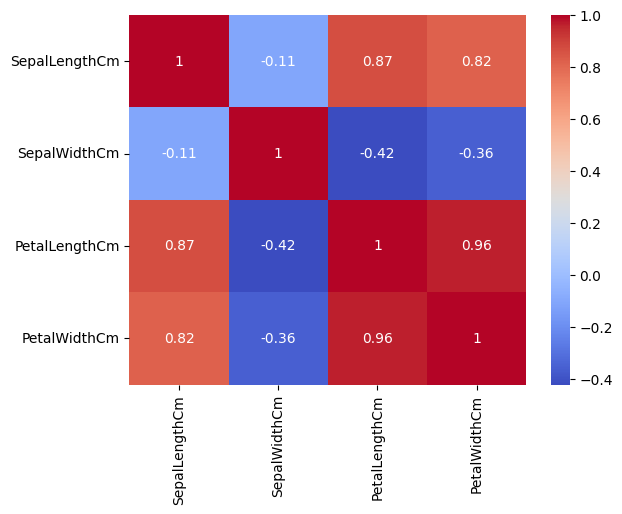

In [36]:
# correlatiion matrix

sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

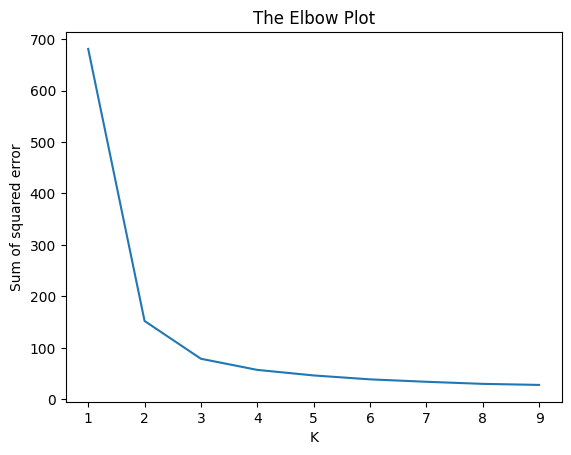

In [37]:
# elbow plot - for finding the best value of k

from sklearn.cluster import KMeans

sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

plt.title('The Elbow Plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

The elbow plot shows that the best value for k (the number of clusters) is 3.

In [38]:
# kmeans clustering

kmeans = KMeans(n_clusters=3, random_state=0, max_iter = 300, init = 'k-means++', n_init = 10)
y_kmeans = kmeans.fit_predict(df)

In [39]:
# predicted outputs

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [40]:
# centoids

kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

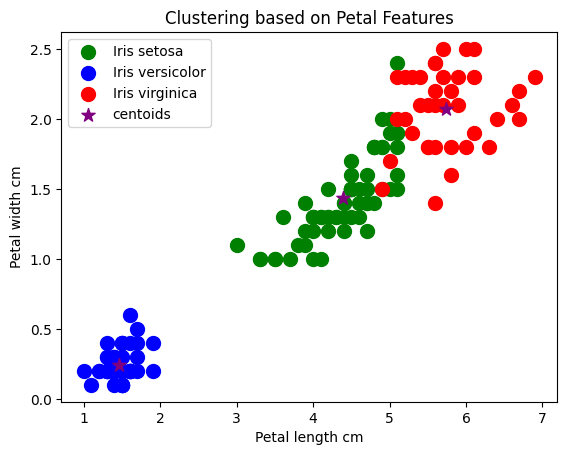

In [41]:
# visualization based on petal length and petal width

plt.scatter(df[y_kmeans == 0]['PetalLengthCm'], df[y_kmeans == 0]['PetalWidthCm'], s = 100, c = 'green', label = 'Iris setosa')
plt.scatter(df[y_kmeans == 1]['PetalLengthCm'], df[y_kmeans == 1]['PetalWidthCm'], s = 100, c = 'blue', label = 'Iris versicolor')
plt.scatter(df[y_kmeans == 2]['PetalLengthCm'], df[y_kmeans == 2]['PetalWidthCm'], s = 100, c = 'red', label = 'Iris virginica')

# plotting centroids

plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], marker='*', s = 100, c = 'purple', label = 'centoids')

plt.title('Clustering based on Petal Features')
plt.xlabel('Petal length cm')
plt.ylabel('Petal width cm')
plt.legend()

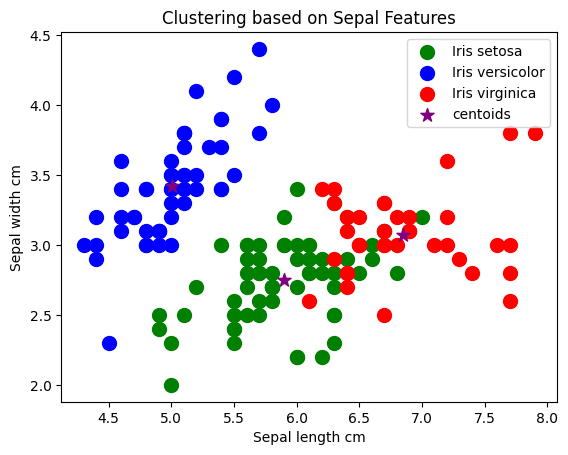

In [42]:
# visualization based on sepal length and sepal width

plt.scatter(df[y_kmeans == 0]['SepalLengthCm'], df[y_kmeans == 0]['SepalWidthCm'], s = 100, c = 'green', label = 'Iris setosa')
plt.scatter(df[y_kmeans == 1]['SepalLengthCm'], df[y_kmeans == 1]['SepalWidthCm'], s = 100, c = 'blue', label = 'Iris versicolor')
plt.scatter(df[y_kmeans == 2]['SepalLengthCm'], df[y_kmeans == 2]['SepalWidthCm'], s = 100, c = 'red', label = 'Iris virginica')

# plotting centroids

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='*', s = 100, c = 'purple', label = 'centoids')

plt.title('Clustering based on Sepal Features')
plt.xlabel('Sepal length cm')
plt.ylabel('Sepal width cm')
plt.legend()